In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, SimpleRNN
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier



data = pd.read_csv('/content/seattle-weather.csv')
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


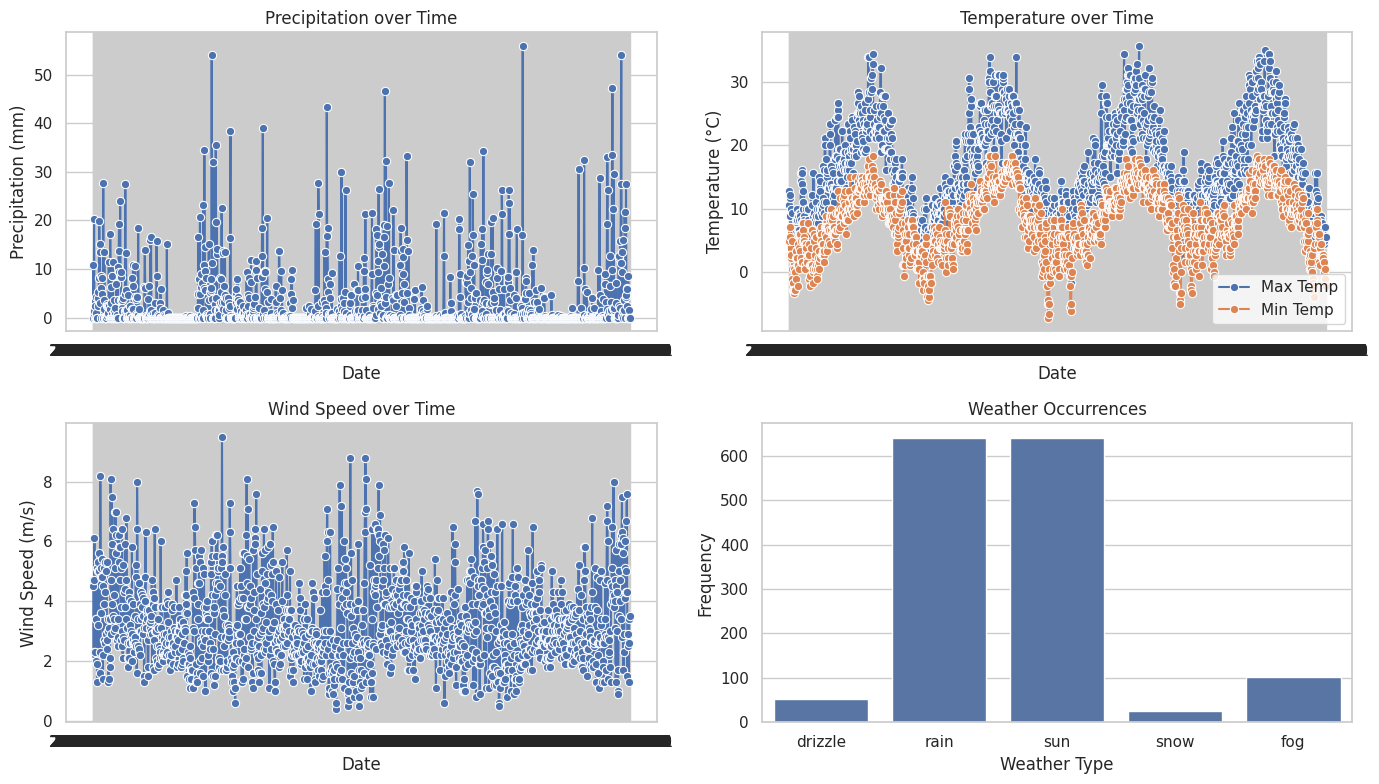

In [2]:

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the data
plt.figure(figsize=(14, 8))

# Subplot 1: Precipitation over time
plt.subplot(2, 2, 1)
sns.lineplot(x='date', y='precipitation', data=data, marker='o')
plt.title('Precipitation over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')

# Subplot 2: Temperature over time
plt.subplot(2, 2, 2)
sns.lineplot(x='date', y='temp_max', data=data, marker='o', label='Max Temp')
sns.lineplot(x='date', y='temp_min', data=data, marker='o', label='Min Temp')
plt.title('Temperature over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()

# Subplot 3: Wind speed over time
plt.subplot(2, 2, 3)
sns.lineplot(x='date', y='wind', data=data, marker='o')
plt.title('Wind Speed over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')

# Subplot 4: Weather occurrences
plt.subplot(2, 2, 4)
sns.countplot(x='weather', data=data)
plt.title('Weather Occurrences')
plt.xlabel('Weather Type')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [4]:
# Convert date to datetime if not already in datetime format
data['date'] = pd.to_datetime(data['date'])


In [5]:

# Feature selection
# Selecting features: 'precipitation', 'temp_max', 'temp_min', 'wind'
selected_features = ['precipitation', 'temp_max', 'temp_min', 'wind']

# Normalizing the data (standardization)
scaler = StandardScaler()
data[selected_features] = scaler.fit_transform(data[selected_features])


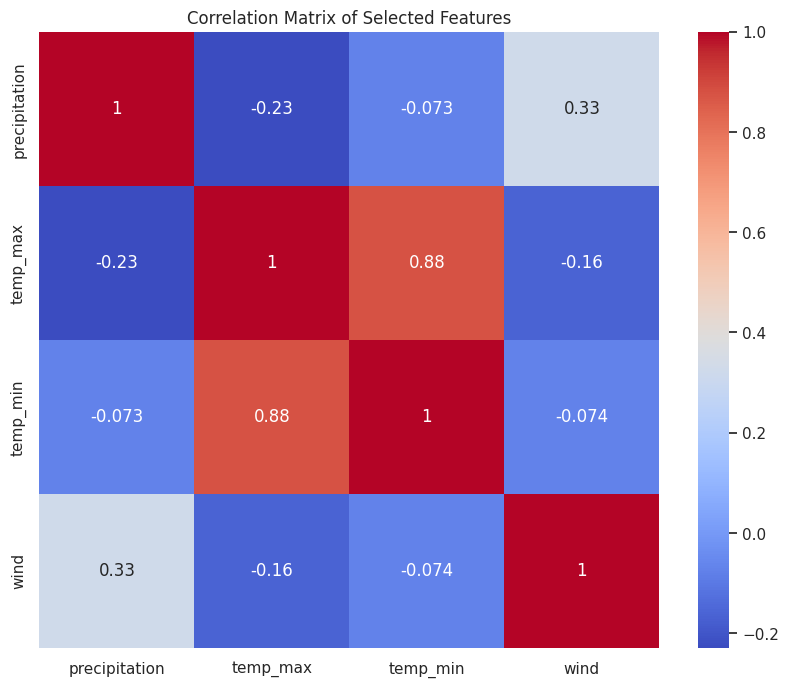

In [6]:
# Visualizing correlations between features
plt.figure(figsize=(10, 8))
correlation_matrix = data[selected_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Selected Features')
plt.show()




In [7]:
# Applying SelectKBest to select top features (using f_regression here as an example)
X = data[selected_features]
# Convert 'weather' to numerical labels using LabelEncoder
le = LabelEncoder()
y = le.fit_transform(data['weather'])

# Using SelectKBest to select features based on their correlation with the target
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

SelectKBest(k='all', score_func=<function f_regression at 0x7e9effb77060>)

In [8]:
# Display scores of the features
feature_scores = pd.DataFrame({'Feature': selected_features, 'Score': selector.scores_})
print(feature_scores)

# Selecting the final set of features based on scores (threshold can be adjusted)
selected_features_final = feature_scores[feature_scores['Score'] > 0.1]['Feature'].tolist()
print("Selected features:", selected_features_final)

         Feature       Score
0  precipitation  112.345093
1       temp_max  169.168656
2       temp_min   35.906536
3           wind    6.355612
Selected features: ['precipitation', 'temp_max', 'temp_min', 'wind']


In [9]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


Accuracy: 81.91%

Classification Report:
              precision    recall  f1-score   support

     drizzle       0.20      0.11      0.14         9
         fog       0.50      0.12      0.19        25
        rain       0.93      0.92      0.92       120
        snow       0.40      0.25      0.31         8
         sun       0.78      0.95      0.86       131

    accuracy                           0.82       293
   macro avg       0.56      0.47      0.48       293
weighted avg       0.79      0.82      0.79       293



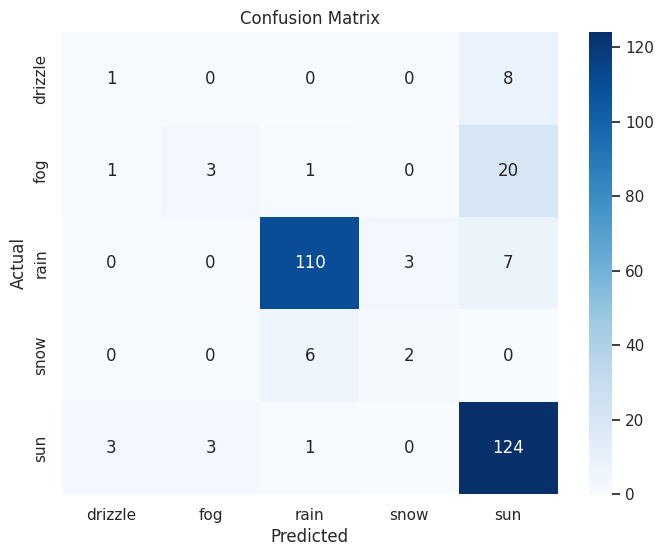

In [10]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Fitting 5 folds for each of 90 candidates, totalling 450 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
95 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils

Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 100}
Accuracy: 83.28%

Classification Report:
              precision    recall  f1-score   support

     drizzle       0.50      0.11      0.18         9
         fog       1.00      0.04      0.08        25
        rain       0.95      0.91      0.93       120
        snow       0.40      0.25      0.31         8
         sun       0.77      1.00      0.87       131

    accuracy                           0.83       293
   macro avg       0.72      0.46      0.47       293
weighted avg       0.84      0.83      0.79       293



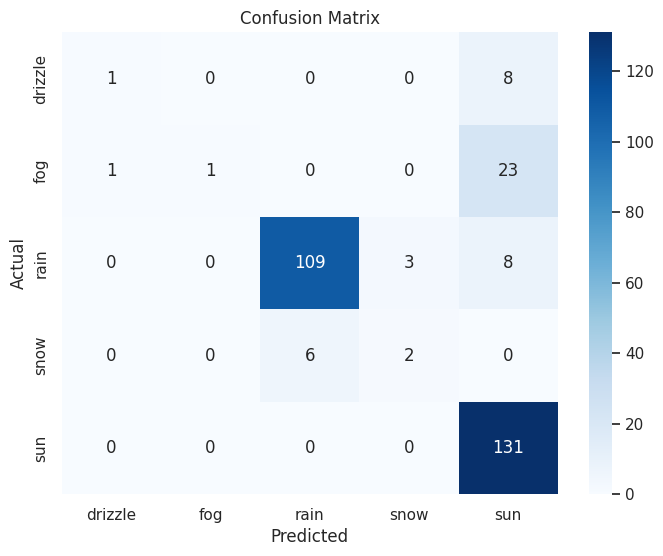

In [11]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy']
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with the Random Forest model and parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the Random Forest model with the best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {rf_accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3030 - loss: 1.5984 - val_accuracy: 0.7045 - val_loss: 1.2661
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6902 - loss: 1.2075 - val_accuracy: 0.6989 - val_loss: 1.0055
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7066 - loss: 0.9578 - val_accuracy: 0.7102 - val_loss: 0.8986
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6936 - loss: 0.9277 - val_accuracy: 0.7614 - val_loss: 0.8317
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7239 - loss: 0.8946 - val_accuracy: 0.7670 - val_loss: 0.7773
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7414 - loss: 0.8350 - val_accuracy: 0.7784 - val_loss: 0.7395
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7606 - loss: 0.7853 - val_accuracy: 0.7898 - val_loss: 0.7094
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7595 - loss: 0.7539 - val_accuracy: 0.7955 - val_loss: 0.6799


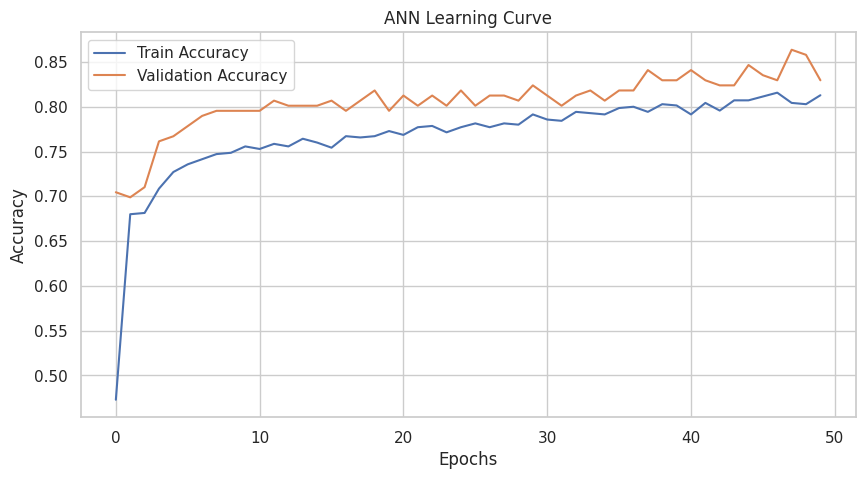

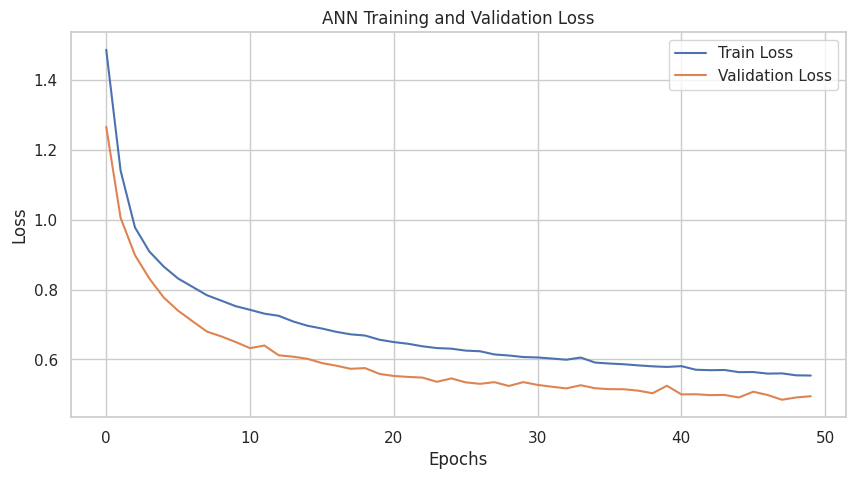

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define the ANN model architecture
ann = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')
])

# Compile the model
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model and save the history
history_ann = ann.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predict using the ANN model
ann_pred = ann.predict(X_test)
ann_pred_labels = np.argmax(ann_pred, axis=-1)  # Converting probabilities to labels
ann_accuracy = accuracy_score(y_test, ann_pred_labels)

# Plotting the learning curves for accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_ann.history['accuracy'], label='Train Accuracy')
plt.plot(history_ann.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting the learning curves for accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_ann.history['loss'], label='Train Loss')
plt.plot(history_ann.history['val_loss'], label='Validation Loss')
plt.title('ANN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3939 - loss: 1.5226 - val_accuracy: 0.5568 - val_loss: 1.2829
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5755 - loss: 1.2146 - val_accuracy: 0.5852 - val_loss: 1.1301
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5924 - loss: 1.1456 - val_accuracy: 0.6023 - val_loss: 1.0647
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6092 - loss: 1.0609 - val_accuracy: 0.5966 - val_loss: 1.0231
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6092 - loss: 1.0102 - val_accuracy: 0.6193 - val_loss: 0.9895
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6349 - loss: 0.9655 - val_accuracy: 0.6420 - val_loss: 0.9597
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6417 - loss: 0.9534 - val_accuracy: 0.6420 - val_loss: 0.9376
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6326 - loss: 0.9726 - val_accuracy: 0.6477 - val_loss: 0.9196
Ep

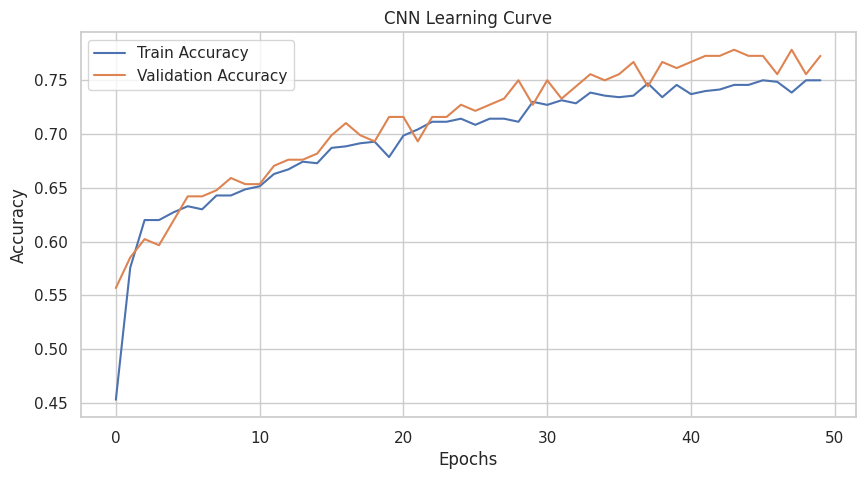

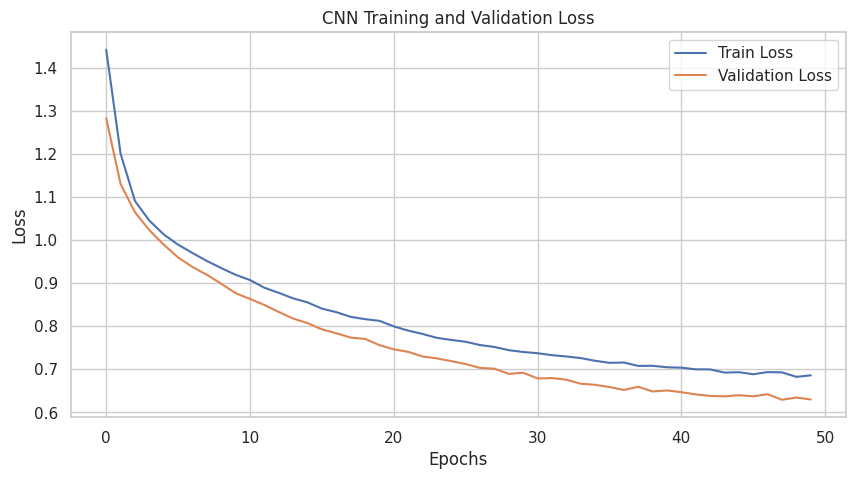

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))


cnn = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')
])

# Compile the CNN model
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model and save the history
history_cnn = cnn.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predict using the CNN model
cnn_pred = cnn.predict(X_test_cnn)
cnn_pred_labels = np.argmax(cnn_pred, axis=-1)  # Converting probabilities to labels
cnn_accuracy = accuracy_score(y_test, cnn_pred_labels)

# Plotting the learning curves for accuracy and loss
plt.figure(figsize=(10, 5))
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('CNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.2921 - loss: 1.6030 - val_accuracy: 0.5341 - val_loss: 1.3394
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5615 - loss: 1.2718 - val_accuracy: 0.6648 - val_loss: 1.0428
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6371 - loss: 1.0448 - val_accuracy: 0.7102 - val_loss: 0.8837
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7133 - loss: 0.9589 - val_accuracy: 0.7614 - val_loss: 0.7889
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7506 - loss: 0.8237 - val_accuracy: 0.7727 - val_loss: 0.7235
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7261 - loss: 0.8378 - val_accuracy: 0.7784 - val_loss: 0.6686
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7429 - loss: 0.7671 - val_accuracy: 0.8011 - val_loss: 0.6480
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7233 - loss: 0.7659 - val_accuracy: 0.8068 - val_loss: 0.5927
Ep

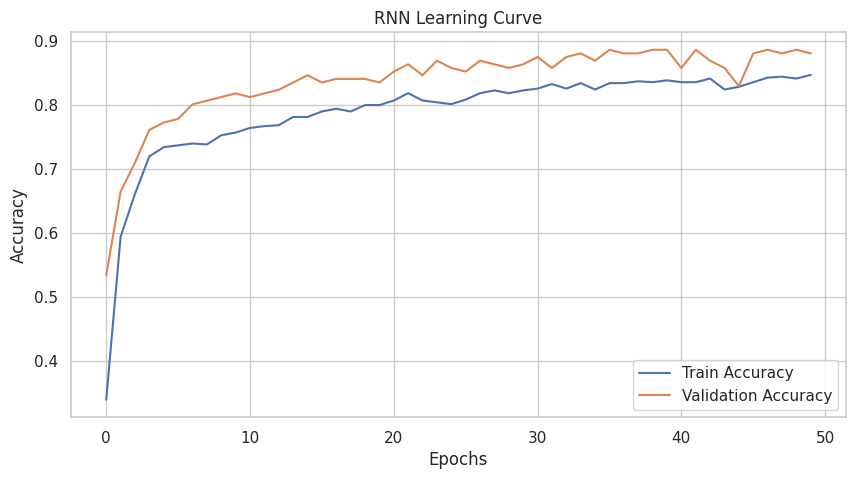

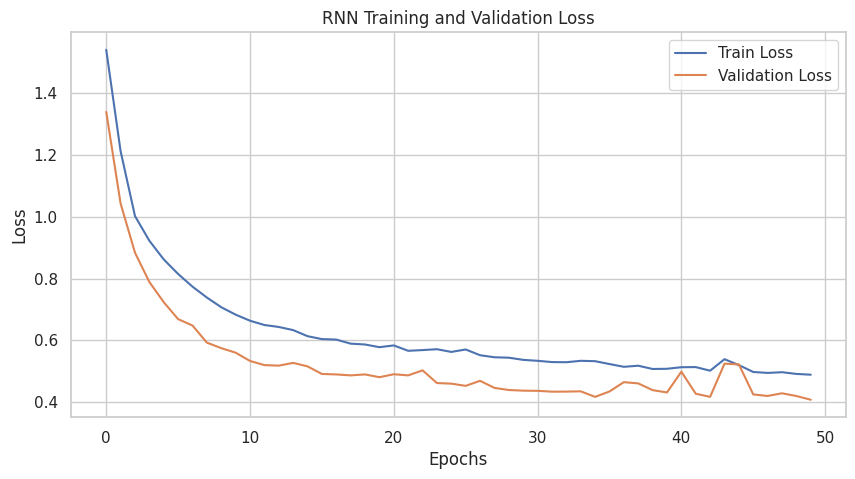

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Define the RNN model architecture
rnn = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),  # 50 RNN units
    Dense(len(np.unique(y_train)), activation='softmax')  # Output layer
])

# Compile the RNN model
rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the RNN model and save the history
history_rnn = rnn.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predict using the RNN model
rnn_pred = rnn.predict(X_test_cnn)
rnn_pred_labels = np.argmax(rnn_pred, axis=-1)  # Converting probabilities to labels
rnn_accuracy = accuracy_score(y_test, rnn_pred_labels)


plt.figure(figsize=(10, 5))
plt.plot(history_rnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('RNN Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history_rnn.history['loss'], label='Train Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('RNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
# SVM Model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Setting the parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'poly'],
    'gamma': ['scale', 'auto']
}

# Creating the SVM classifier
svm = SVC()

# Setting up the GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, verbose=2, n_jobs=-1)

# Fitting the GridSearch to the data
grid_search_svm.fit(X_train, y_train)

# Best parameters and model
best_params_svm = grid_search_svm.best_params_
best_svm = grid_search_svm.best_estimator_

# Predictions and evaluation
svm_pred = best_svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"Optimized SVM Accuracy: {svm_accuracy:.2f}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Optimized SVM Accuracy: 0.83


In [16]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Setting the parameter grid
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Creating the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Setting up the GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, verbose=2, n_jobs=-1)

# Fitting the GridSearch to the data
grid_search_dt.fit(X_train, y_train)

# Best parameters and model
best_params_dt = grid_search_dt.best_params_
best_dt = grid_search_dt.best_estimator_

# Predictions and evaluation
dt_pred = best_dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Optimized Decision Tree Accuracy: {dt_accuracy:.2f}")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Optimized Decision Tree Accuracy: 0.80


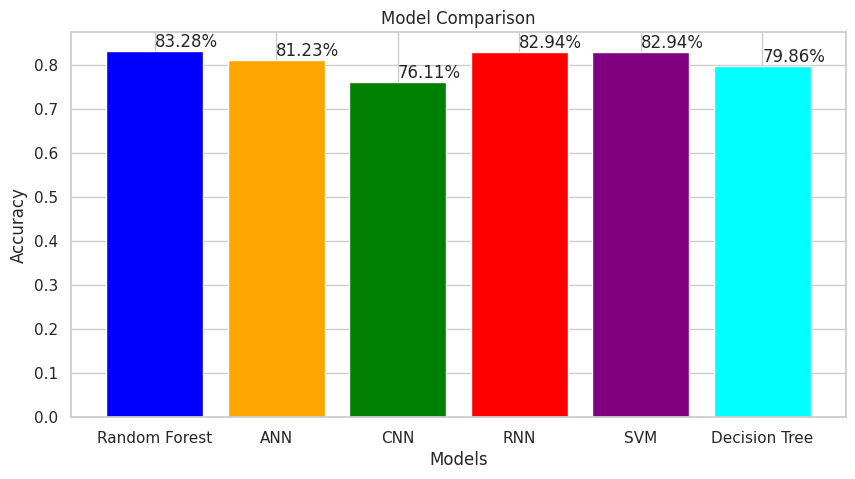

Random Forest Accuracy: 83.28%
ANN Accuracy: 81.23%
CNN Accuracy: 76.11%
RNN Accuracy: 82.94%
SVM Accuracy: 82.94%
Decision Tree Accuracy: 79.86%


In [18]:
import matplotlib.pyplot as plt

# Compare Models
models = ['Random Forest', 'ANN', 'CNN', 'RNN', 'SVM', 'Decision Tree']
accuracies = [rf_accuracy, ann_accuracy, cnn_accuracy, rnn_accuracy, svm_accuracy, dt_accuracy]

fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(models, accuracies, color=['blue', 'orange', 'green', 'red', 'purple', 'cyan'])
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Model Comparison')

# Adding the text labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2%}', va='bottom')  # va: vertical alignment

plt.show()

print(f"Random Forest Accuracy: {rf_accuracy:.2%}")
print(f"ANN Accuracy: {ann_accuracy:.2%}")
print(f"CNN Accuracy: {cnn_accuracy:.2%}")
print(f"RNN Accuracy: {rnn_accuracy:.2%}")
print(f"SVM Accuracy: {svm_accuracy:.2%}")
print(f"Decision Tree Accuracy: {dt_accuracy:.2%}")

In [19]:
# Train-test splits
splits = {'90-10': 0.1, '80-20': 0.20, '75-25': 0.25, '70-30': 0.3, '60-40': 0.4}
results = []

# Function to create and evaluate models
def evaluate_models(X_train, X_test, y_train, y_test):
    accuracies = {}

    # Random Forest Model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    rf_accuracy = accuracy_score(y_test, rf_pred)
    accuracies['Random Forest'] = rf_accuracy

    # Decision Tree Model
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train, y_train)
    dt_pred = dt_model.predict(X_test)
    dt_accuracy = accuracy_score(y_test, dt_pred)
    accuracies['Decision Tree'] = dt_accuracy

    # ANN Model
    ann = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(len(np.unique(y_train)), activation='softmax')
    ])
    ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    ann.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
    ann_pred = np.argmax(ann.predict(X_test), axis=-1)
    ann_accuracy = accuracy_score(y_test, ann_pred)
    accuracies['ANN'] = ann_accuracy

    # CNN Model
    X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
    cnn = Sequential([
        Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(len(np.unique(y_train)), activation='softmax')
    ])
    cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    cnn.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
    cnn_pred = np.argmax(cnn.predict(X_test_cnn), axis=-1)
    cnn_accuracy = accuracy_score(y_test, cnn_pred)
    accuracies['CNN'] = cnn_accuracy

    # RNN Model
    rnn = Sequential([
        SimpleRNN(50, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
        Dense(len(np.unique(y_train)), activation='softmax')
    ])
    rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    rnn.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
    rnn_pred = np.argmax(rnn.predict(X_test_cnn), axis=-1)
    rnn_accuracy = accuracy_score(y_test, rnn_pred)
    accuracies['RNN'] = rnn_accuracy

    # SVM Model
    svm = SVC(kernel='linear')
    svm.fit(X_train, y_train)
    svm_pred = svm.predict(X_test)
    svm_accuracy = accuracy_score(y_test, svm_pred)
    accuracies['SVM'] = svm_accuracy

    return accuracies

In [20]:
# Evaluate models for each split ratio
for split_name, split_ratio in splits.items():
    X_train, X_test, y_train, y_test = train_test_split(X[selected_features_final], y, test_size=split_ratio, random_state=42)
    accuracies = evaluate_models(X_train, X_test, y_train, y_test)
    accuracies['Split Ratio'] = split_name
    results.append(accuracies)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming results_df has been created as before
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


   Random Forest  Decision Tree       ANN       CNN       RNN       SVM  \
0       0.823129       0.707483  0.823129  0.748299  0.816327  0.802721   
1       0.819113       0.730375  0.805461  0.761092  0.832765  0.778157   
2       0.808743       0.754098  0.819672  0.765027  0.825137  0.781421   
3       0.829157       0.740319  0.815490  0.765376  0.838269  0.788155   
4       0.832479       0.735043  0.820513  0.729915  0.837607  0.794872   

  Split Ratio  
0       90-10  
1       80-20  
2       75-25  
3       70-30  
4       60-40  


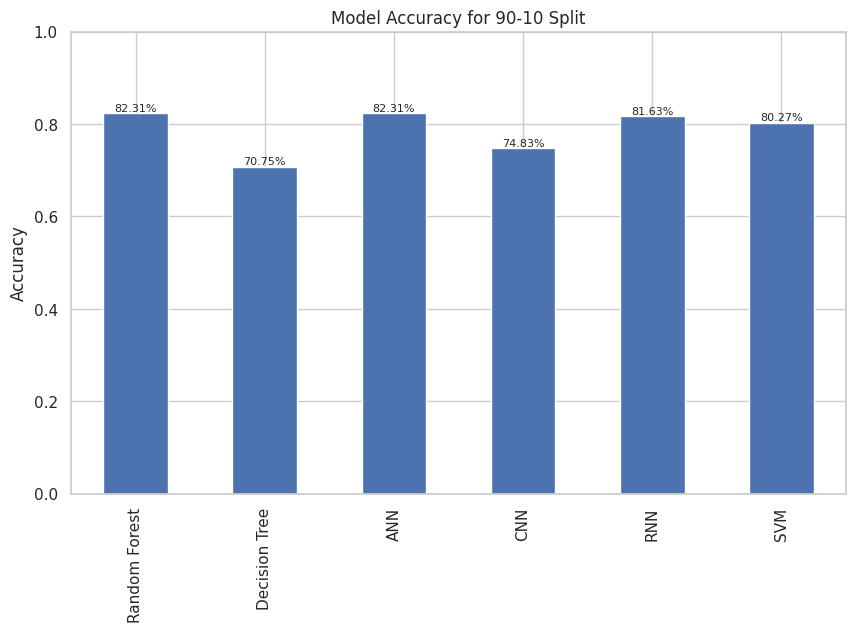

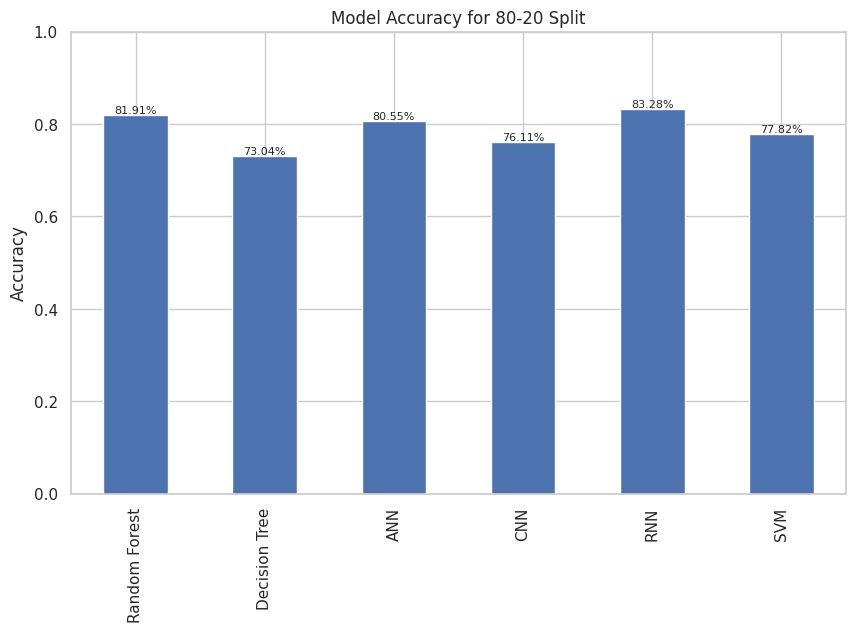

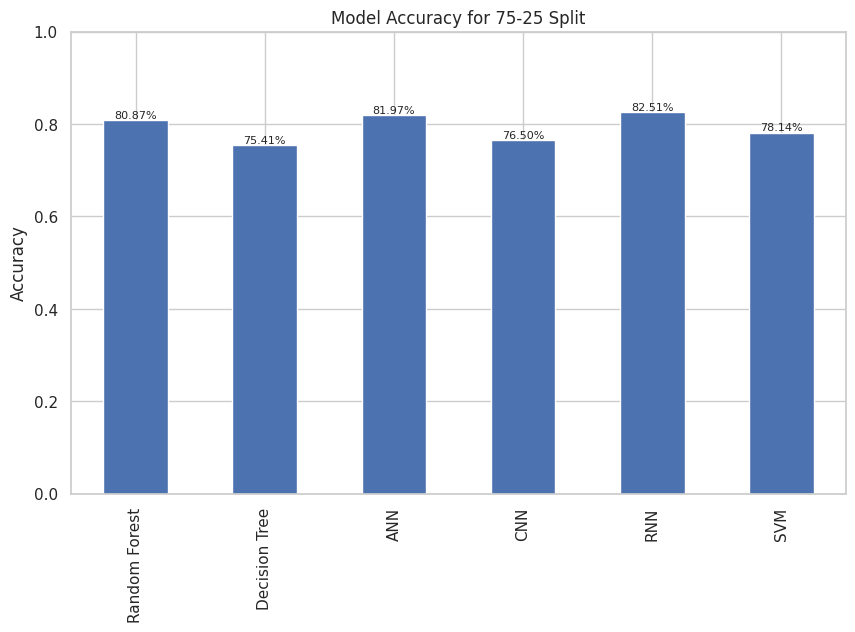

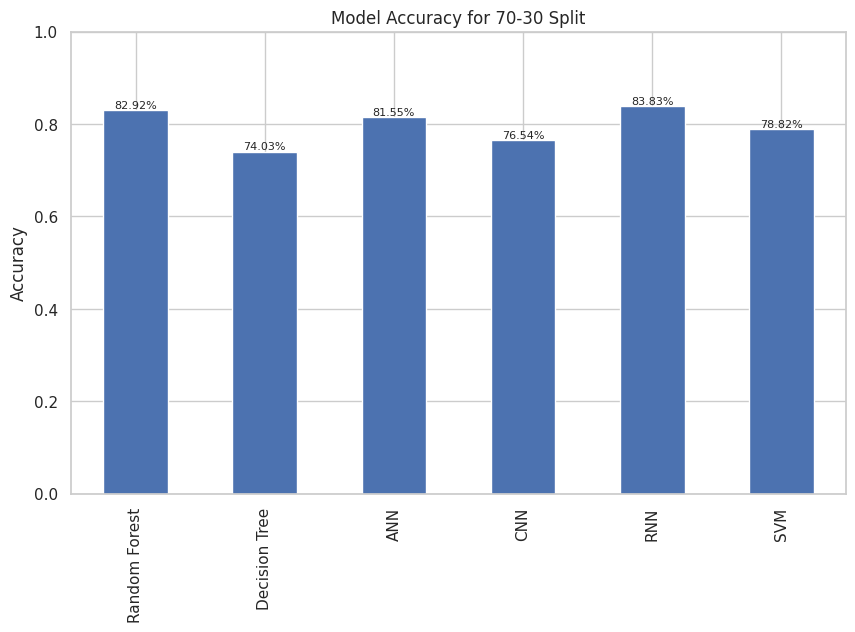

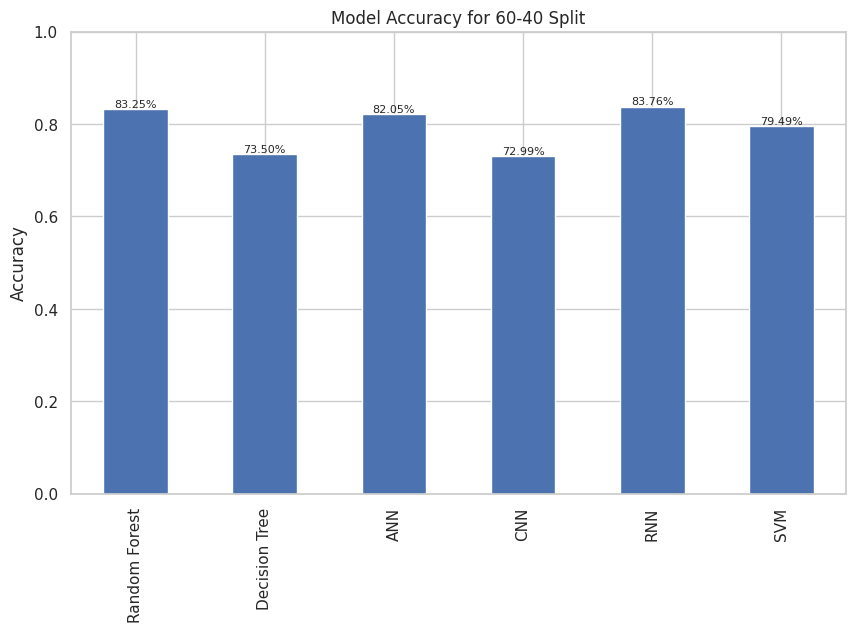

In [25]:
import matplotlib.pyplot as plt

results_df = pd.DataFrame(results)
results_df.set_index('Split Ratio', inplace=True)

# Generate separate graphs for each split ratio
for split_ratio in results_df.index.unique():
    ax = results_df.loc[split_ratio].plot(kind='bar', figsize=(10, 6), title=f'Model Accuracy for {split_ratio} Split')
    ax.set_ylim(0, 1)  # Ensure consistent scale for comparison
    ax.set_ylabel('Accuracy')

    # Add accuracy percentages on the bars
    for p in ax.patches:  # Loop over each bar patch
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.text(x + width/2,
                y + height,
                f'{height:.2%}',  # Format height as a percentage
                ha='center',  # Horizontal alignment
                va='bottom',  # Vertical alignment
                fontsize=8)  # Adjust fontsize to fit your needs

    plt.show()